# Context


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Content
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index

dteday : date

season : season (1:winter, 2:spring, 3:summer, 4:fall)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-tmin)/
(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

Acknowledgements
Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

Original Source: http://capitalbikeshare.com/system-data
Weather Information: http://www.freemeteo.com
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule

Inspiration
Keep Helping and keep growing

fazermos a previsão do uso de bicicletas alugadas;



In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bike = pd.read_csv('/content/day.csv', parse_dates=["dteday"])
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


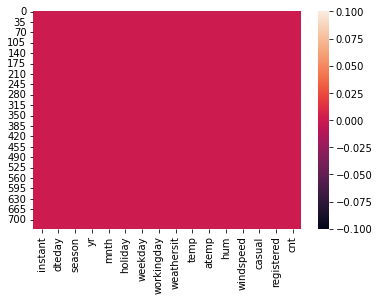

In [5]:
sns.heatmap(bike.isnull());

In [6]:
bike = bike.drop(labels=['instant'], axis = 1)

In [7]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


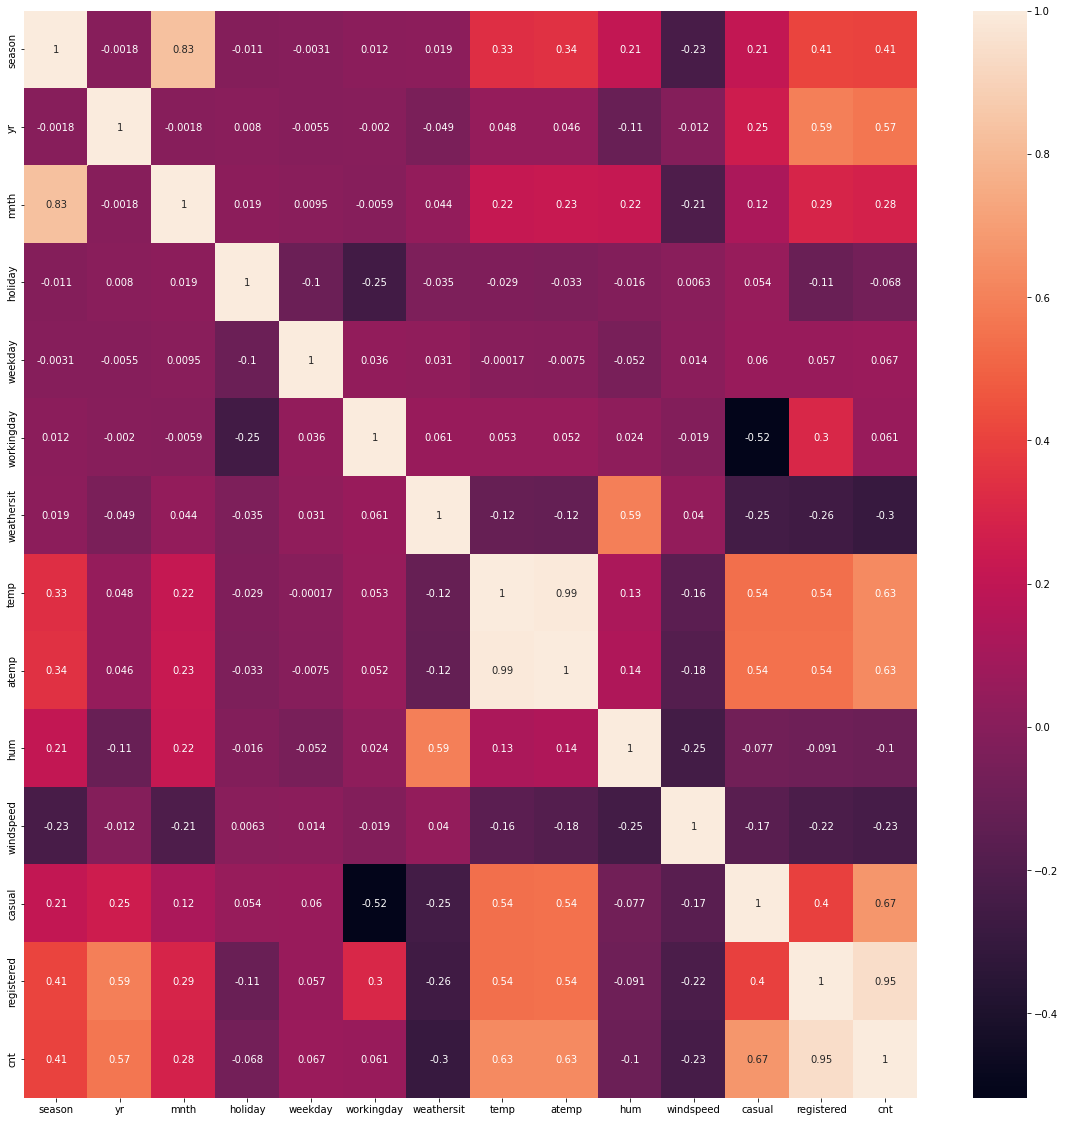

In [8]:
correlations = bike.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

In [9]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

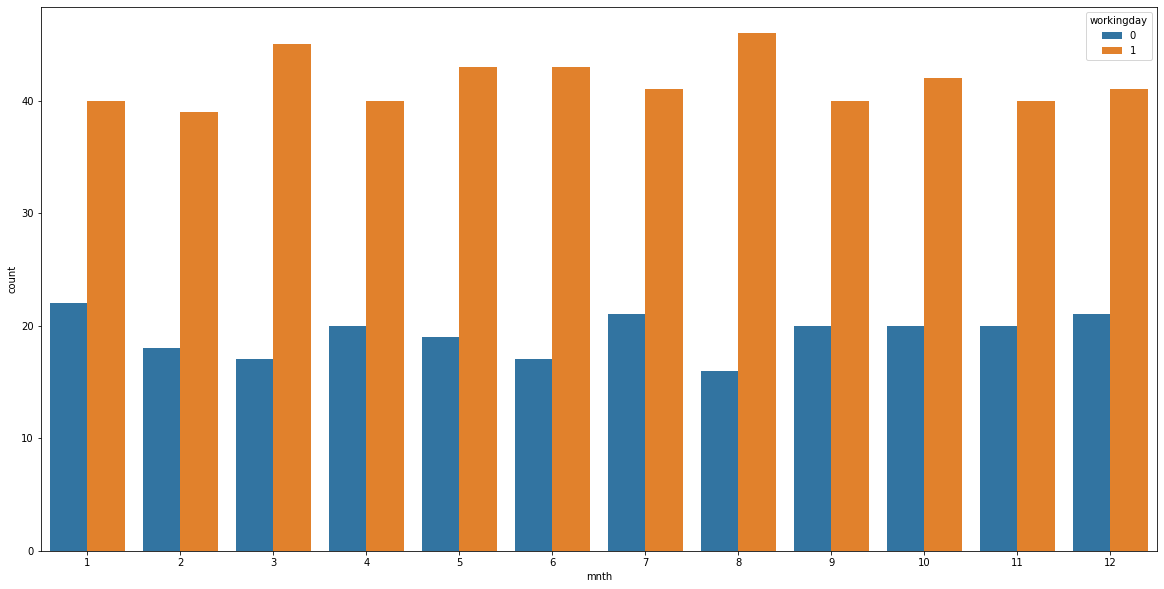

In [10]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'mnth', hue= 'workingday', data=bike);

As bicicletas são muito mais utilizadas em dias úteis, provavelmente são mais utilizadas para o trabalho como opção ao transporte público do que ao lazer.

(0.0, 68.2)

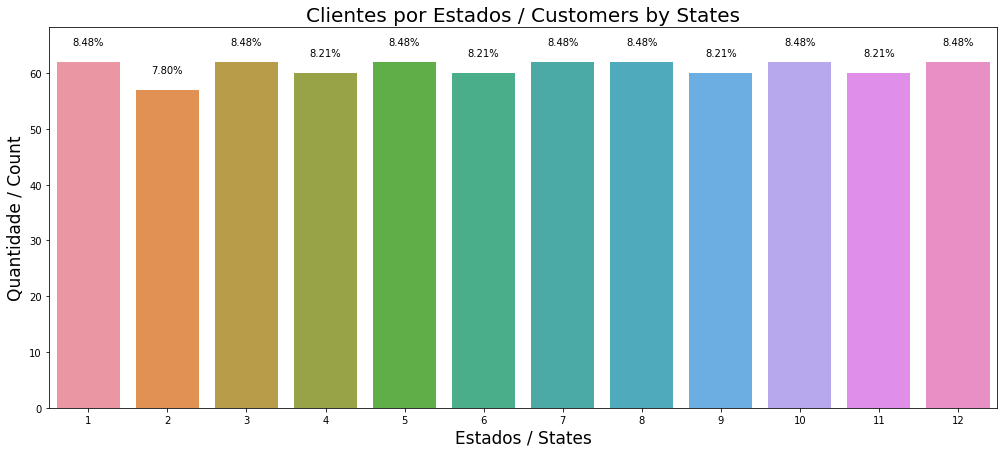

In [11]:
total = len(bike)
ax1 = plt.figure(figsize=(17,7))

g = sns.countplot(x='mnth', data=bike)
g.set_title("Clientes por Estados / Customers by States", fontsize=20)
g.set_xlabel("Estados / States", fontsize=17)
g.set_ylabel("Quantidade / Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

nteressante que é muito próxima essa divisão, possívelmente há um público que é adpto a utilização das bicicletas.

(0.0, 550.0)

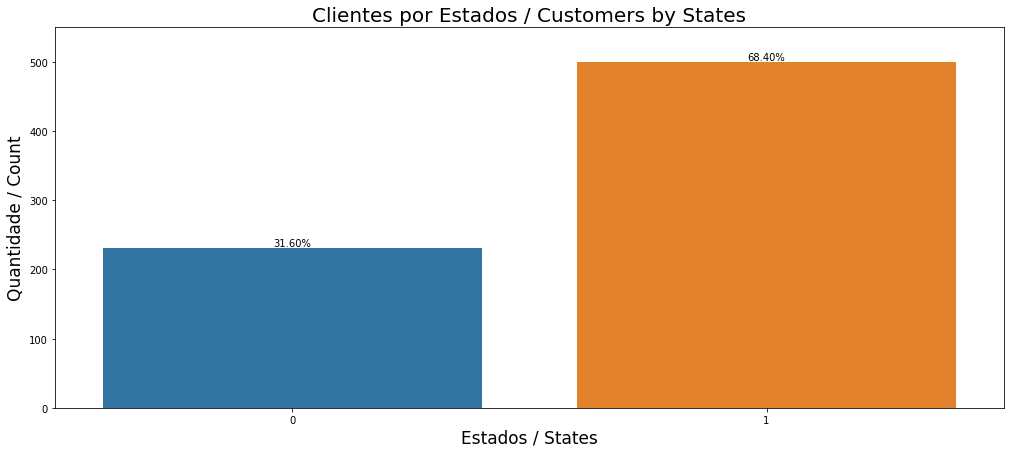

In [12]:
total = len(bike)
ax1 = plt.figure(figsize=(17,7))

g = sns.countplot(x='workingday', data=bike)
g.set_title("Clientes por Estados / Customers by States", fontsize=20)
g.set_xlabel("Estados / States", fontsize=17)
g.set_ylabel("Quantidade / Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

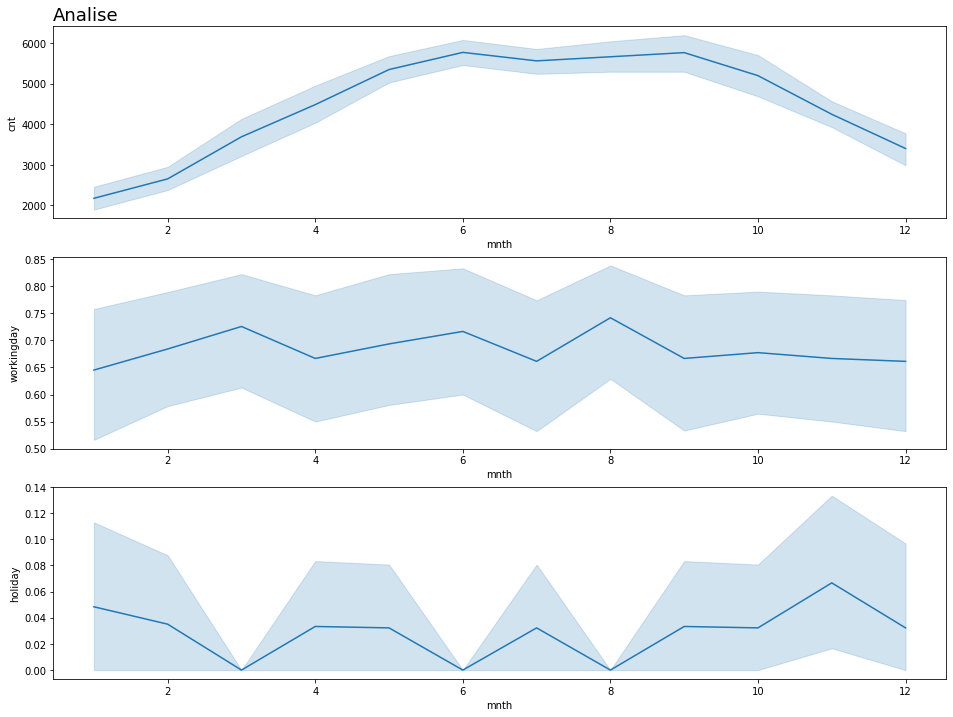

In [13]:
plt.figure(figsize=(16,12)) 
ax = plt.subplot(3,1,1)                                                 
ax.set_title('Analise', fontsize=18, loc='left') 
sns.lineplot(x='mnth', y='cnt', data=bike)   
plt.subplot(3,1,2) 
sns.lineplot(x='mnth', y='workingday', data=bike)  
plt.subplot(3,1,3)  
sns.lineplot(x='mnth', y='holiday', data=bike)  
ax = ax

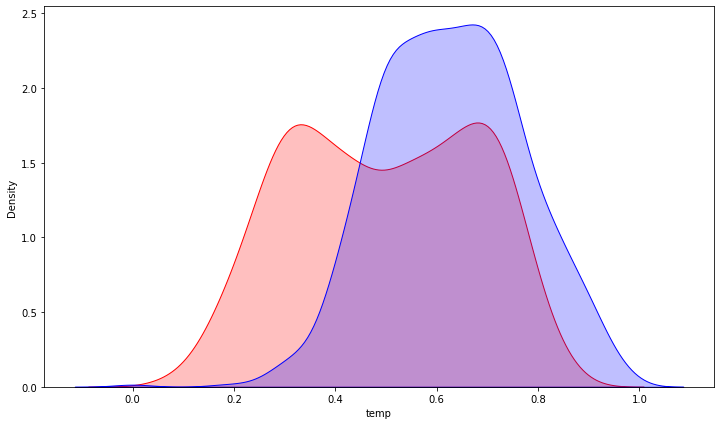

In [14]:
plt.figure(figsize=(12,7))
sns.kdeplot(bike['temp'], label = 'Funcionários que sairam da empresa', shade = True, color = 'r');
sns.kdeplot(bike['hum'], label = 'Funcionários que ficaram na empresa', shade = True, color = 'b');

In [15]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [16]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [17]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [18]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [19]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341


In [20]:
bike.loc[:, ~bike.columns.duplicated()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341


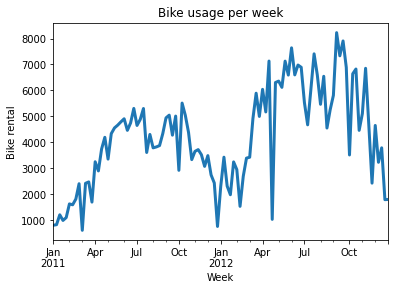

In [21]:
bike['cnt'].asfreq('W').plot(linewidth = 3)     # >>>> colocamos aqui o W para o gráfico ser agrupado por semana;
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental');

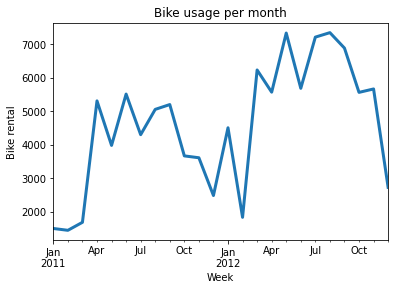

In [22]:
bike['cnt'].asfreq('M').plot(linewidth = 3)    # >>>> colocamos aqui o M para o gráfico ser agrupado por mês;
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental');

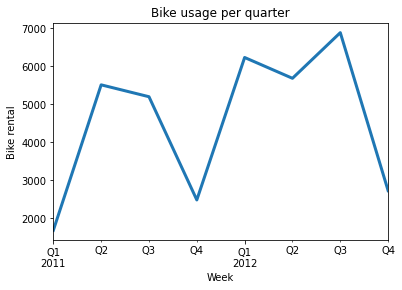

In [23]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)     # >>>> colocamos aqui o Q para o gráfico ser agrupado por 15 dias;
plt.title('Bike usage per quarter')
plt.xlabel('Week')
plt.ylabel('Bike rental');

In [24]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']] 

In [25]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


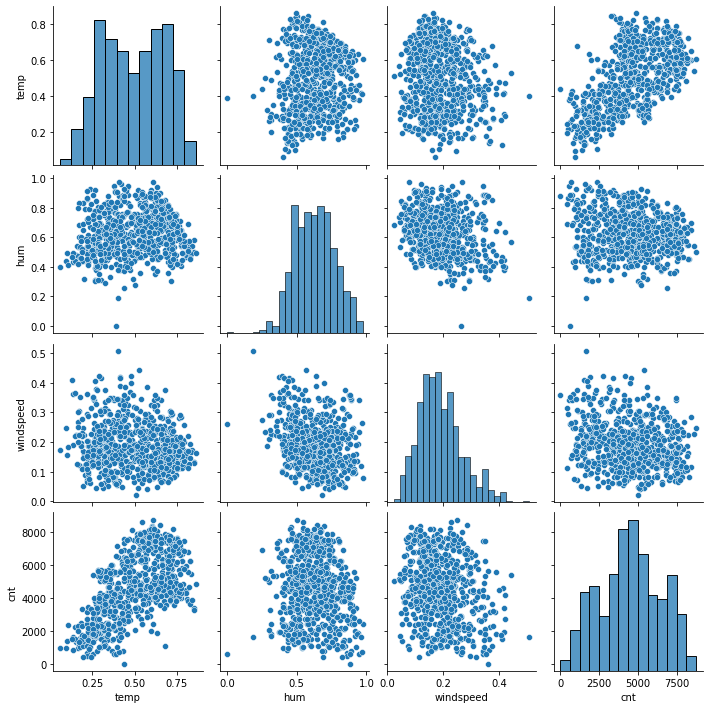

In [26]:
sns.pairplot(X_numerical)

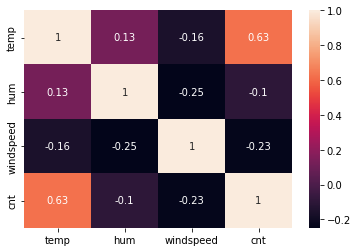

In [27]:
sns.heatmap(X_numerical.corr(), annot = True);

In [28]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]  # nova váriavel para receber os atributos categóricos;

In [29]:
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [30]:
from sklearn.preprocessing import OneHotEncoder   # criar as váriavies do tipo dummy; para não fazer juizo de valor em relação aso números;
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [31]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [32]:
X_cat.shape

(731, 32)

In [33]:
X_cat = pd.DataFrame(X_cat)

In [34]:
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
X_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


In [36]:
X_numerical = X_numerical.reset_index()  # agora vamos colocar o indice númerico novamente;

In [37]:
X_numerical.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


In [38]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [39]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [40]:
X_all = X_all.drop(labels=['dteday'], axis = 1)   # apagar a coluna com a data;

In [41]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [42]:
X = X_all.iloc[:, :-1].values   # -1 nós não querremo o último atributo que é nosso resultado

In [43]:
y = X_all.iloc[:, -1:].values   # -1: ele apaga todos  atributos pegando apenas o último;

In [44]:
X.shape

(731, 35)

In [45]:
y.shape

(731, 1)

In [46]:
from sklearn.preprocessing import MinMaxScaler   # processamento na escala entre 0 e 1
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [47]:
from sklearn.model_selection import train_test_split   #  treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
X_train.shape

(584, 35)

In [49]:
X_test.shape

(147, 35)

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))  # relu se for negativo ele colocará 0, se for positivo ele mantém o número;
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))  # 1 pois estamos buscando apenas um valor / linear pois estamos trabalhando com regressão;

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='Adam', loss='mean_squared_error')  # Adam padrão para esse tipo de aplicação,

In [53]:
epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 1s 18ms/step - loss: 0.0942 - val_loss: 0.0371
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 0.0233
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0146 - val_loss: 0.0217
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0179
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.0167
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0172
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0150
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0154
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0145
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0144
Epoch 11/25
10/10 

In [54]:
epochs_hist.history.keys()  # Valores retornados

dict_keys(['loss', 'val_loss'])

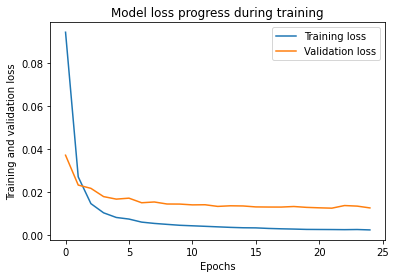

In [55]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

Pelo erro de validação podemos verificar que não precisariamos realizar o treinamento por 25 epócas, já na 20 estabilizou, sendo que posteiormente ele aumentou o erro;

Podemos utilizar a intersecção entre as duas para treinamento;

In [56]:
y_predict = model.predict(X_test)

In [57]:
y_predict

array([[0.47295076],
       [0.79885167],
       [0.7928287 ],
       [0.47105473],
       [0.45599556],
       [0.26266688],
       [0.6079052 ],
       [0.5486254 ],
       [0.1895935 ],
       [0.43806756],
       [0.42159715],
       [0.55398935],
       [0.17234623],
       [0.28315708],
       [0.5967149 ],
       [0.5263176 ],
       [0.5001462 ],
       [0.65958804],
       [0.34913728],
       [0.7794264 ],
       [0.8831153 ],
       [0.57975715],
       [0.40043172],
       [0.727856  ],
       [0.4768729 ],
       [0.82329845],
       [0.4361776 ],
       [0.41364783],
       [0.7917307 ],
       [0.49358064],
       [0.7994945 ],
       [0.22194815],
       [0.73878974],
       [0.4956849 ],
       [0.70472246],
       [0.37651426],
       [0.542764  ],
       [0.3152304 ],
       [0.56343687],
       [0.42517957],
       [0.7916877 ],
       [0.6047073 ],
       [0.4779358 ],
       [0.80363226],
       [0.7572682 ],
       [0.65395635],
       [0.74344707],
       [0.797

Text(0, 0.5, 'True values')

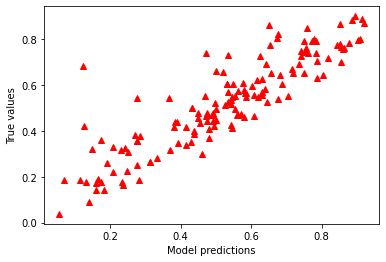

In [58]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')     # No eixo x temos os valores reais e y os valores das previsões;
plt.ylabel('True values')

In [59]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True values')

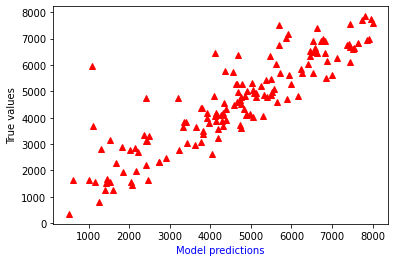

In [60]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model predictions', color = 'b')     # aqui os valores na escala original;
plt.ylabel('True values')

In [61]:
k = X_test.shape[1]
k

35

In [62]:
n = len(X_test)
n

147

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [64]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [65]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  613.2163559271365 
MSE:  745876.6468907709 
RMSE:  863.6415036870164 
R2:  0.7898038919458623 
ADJ R2:  0.7235258398567198


**# Conclusion**

R2 78% da variações da saída foram capturadas pelo parãmetros ou atributos de entrada;

ADJ R2 ajustado mais baixo que o R2, alguns atributos acabaram influênciando para esse resultado, podemos apagar alguns atributos que serão irrelevantes para o algoritimo e melhorarmos os resultados.

Podemos utilizar técnicas de seleção de atributios e fazermos um seleção mais inteligênte para o algoritimo.